In [ ]:
!pip install langchain_community
!pip install replicate

### Import Library

In [229]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata
from langchain_community.llms import Replicate

#### Load Dataset


In [205]:
file_path = "Data Training-1.csv"
df = pd.read_csv(file_path)

In [226]:
df.head()

,Periode,Bulan,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total
0,2006,Februari,234465,614960,2675459,2860007,2842876,1204140,297185,375601,11104693
1,2006,Agustus,170666,611254,2589699,2730045,2851518,1305190,278074,395554,10932000
2,2007,Februari,145750,520316,2753548,2643062,2630360,1114675,330316,409890,10547917
3,2007,Agustus,94301,438519,2179792,2264198,2532204,1538349,397191,566588,10011142
4,2008,Februari,79764,448431,2216748,2166619,2204377,1165582,519867,626202,9427590


In [207]:
df.shape

(35, 11)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Periode                     35 non-null     int64 
 1   Bulan                       35 non-null     object
 2   Tidak/belum pernah sekolah  35 non-null     int64 
 3   Tidak/belum tamat SD        35 non-null     int64 
 4   SD                          35 non-null     int64 
 5   SLTP                        35 non-null     int64 
 6   SLTA Umum/SMU               35 non-null     int64 
 7   SLTA Kejuruan/SMK           35 non-null     int64 
 8   Akademi/Diploma             35 non-null     int64 
 9   Universitas                 35 non-null     int64 
 10  Total                       35 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.1+ KB


In [209]:
df.describe().map(lambda x: f"{x:.0f}")

,Periode,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total
count,35,35,35,35,35,35,35,35,35,35
mean,2014,83398,496155,1462738,1697168,2153685,1422718,290183,642869,8247912
std,5,53949,105794,511294,436737,351846,336166,103575,167113,1233931
min,2006,15206,328781,865778,1137195,1546699,847365,159490,375601,6898796
25%,2010,38596,422384,1219224,1343867,1902169,1184779,219345,548211,7125746
50%,2014,79764,489152,1320392,1650387,2133627,1383022,254457,626621,8319779
75%,2018,107820,579941,1487256,1828030,2437820,1595546,317788,743362,9032334
max,2022,234465,737610,2753548,2860007,2851518,2326599,538186,999543,11104693


#### Visualisasi distribusi

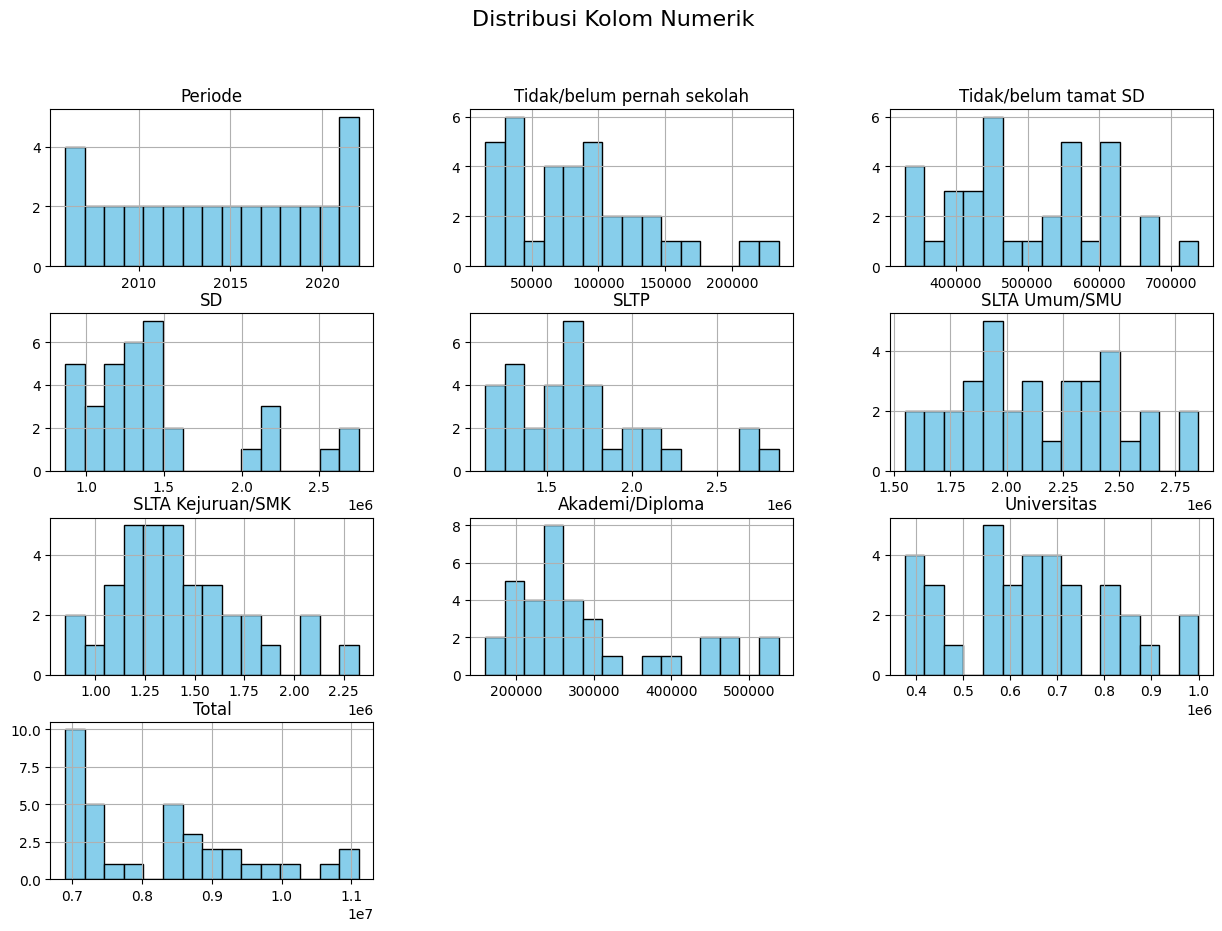

In [228]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Kolom Numerik", fontsize=16)
plt.show()

#### Connect to IBM Granite Model via Replicate

In [210]:
api_token = userdata.get('token')
os.environ["REPLICATE_API_TOKEN"] = api_token
model = "ibm-granite/granite-3.2-8b-instruct"

output = Replicate(
    model=model,
    replicate_api_token=api_token,
)

#### Parameters

In [211]:
parameters = {
"top_k": 50,
"top_p": 0.9,
"max_tokens": 254,
"min_tokens": 254,
"random_seed": None,
"repetition_penalty": None,
"stopping_criteria": None,
"stopping_sequence": None
}

#### prompt Analysis

In [194]:
prompt = f"""
Analyze the unemployment trend in Indonesia based on education level over the years:
{df}
"""


#### Invoke the model with the prompt and Print the response

In [196]:
response = output.invoke(prompt)

print("Granite Model Response:\n")
print(response)

Granite Model Response:

To analyze the unemployment trend in Indonesia based on education level, we'll examine the data provided and observe the patterns in unemployment rates for different education levels over the years.

1. **No Education/Never Attended School:**
   - The numbers fluctuate significantly over the years, with peaks around 2006, 2009, 2011, and 2012.
   - The highest unemployment rate was in August 2006 (614960), and the lowest was in February 2018 (43740).

2. **Didn't Finish Elementary School (SD):**
   - Unemployment rates are generally lower compared to those without any education.
   - Peaks are observed around 2006, 2007, 2008, 2010, 2011, 2012, and 2013.
   - The highest unemployment rate was in August 2006 (611254), and the lowest was in February 2018 (2675459).

3. **Finished Elementary School (SD):**
   - Unemployment rates are also lower than those without any education.
   - Peaks are observed around 2006, 2007, 2008, 2009, 2010, 2011, 2012, and 2013.
   -

#### Define refined prompt

In [223]:
prompt = f"""
Analyze unemployment trends in Indonesia based on education level over the years:
provide categories based on how the trend has evolved over time (increasing, decreasing, or fluctuating).
{df}
"""

#### Invoke the model with the prompt and Print the response

In [215]:
refined_response = output.invoke(prompt)

print("Granite Model Response:\n")
print(refined_response)

Granite Model Response:

To analyze the unemployment trends in Indonesia based on education level, we will observe the data for each category over time and categorize them as increasing, decreasing, or fluctuating.

1. **No/Never Attended School**:
   - The numbers fluctuate over the years, with no clear upward or downward trend.
   - Category: Fluctuating

2. **Did Not Complete Elementary School (SD)**:
   - Unemployment rates decrease significantly from 2006 to 2010, then fluctuate between 2010 and 2015, and decrease again after 2015.
   - Category: Decreasing (2006-2010), Fluctuating (2010-2015), Decreasing (2015-2022)

3. **Completed Elementary School (SD) but Did Not Complete Junior High School (SLTP)**:
   - Unemployment rates generally decrease from 2006 to 2010, fluctuate between 2010 and 2015, then decrease again after 2015.
   - Category: Decreasing (2006-2010), Fluctuating (2010-2015), Decreasing (2015-2022)

4. **Completed Junior High School (SLTP) but Did Not Complete Seni

#### Define the prompt to complete the task in 2 steps

In [216]:
prompt = f"""
Complete the task in two steps.
Step 1: Analyze the data based on timescales
Step 2: Identify relevant categories: increasing, decreasing, or fluctuating.
{df}
"""

#### Invoke the model with the prompt and Print the response

In [220]:
multitask_prompt = output.invoke(prompt)

print("Granite Model Response:\n")
print(multitask_prompt)

Granite Model Response:

Step 1: Analyze the data based on timescales

The dataset provided contains educational data for various levels (Tidak/belum pernah sekolah, Tidak/belum tamat SD, SD, SLTP, SLTA Umum/SMU, SLTA Kejuruan/SMK, Akademi/Diploma, Universitas, and Total) across different months (Februari, Agustus) and years (2006 to 2022). 

The dataset shows the number of individuals at each educational level for each period. For instance, in February 2006, there were 234,465 individuals who had never attended school, 6,149,600 who hadn't completed elementary school (SD), 2,675,459 who completed elementary school (SD), and so on. 

Step 2: Identify relevant categories: increasing, decreasing, or fluctuating.

To categorize the trends as increasing, decreasing, or fluctuating, we need to observe the data over time. Here's a simplified analysis:

1. **Tidak/belum pernah sekolah (Never attended school)**: 
   - The number seems to fluctuate with no clear increasing or decreasing trend o